In [2]:
import pandas as pd
import os
import sys
import gzip

In [3]:
### data path
path0 = 'Data/'
filename = 'reviews_Amazon_Instant_Video_5.json.gz'
path = path0 + filename

In [4]:
### function to extract and parse the data

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF(path)

In [5]:
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A11N155CW1UV02,B000H00VBQ,AdrianaM,"[0, 0]",I had big expectations because I love English ...,2.0,A little bit boring for me,1399075200,"05 3, 2014"
1,A3BC8O2KCL29V2,B000H00VBQ,Carol T,"[0, 0]",I highly recommend this series. It is a must f...,5.0,Excellent Grown Up TV,1346630400,"09 3, 2012"
2,A60D5HQFOTSOM,B000H00VBQ,"Daniel Cooper ""dancoopermedia""","[0, 1]",This one is a real snoozer. Don't believe anyt...,1.0,Way too boring for me,1381881600,"10 16, 2013"
3,A1RJPIGRSNX4PW,B000H00VBQ,"J. Kaplan ""JJ""","[0, 0]",Mysteries are interesting. The tension betwee...,4.0,Robson Green is mesmerizing,1383091200,"10 30, 2013"
4,A16XRPF40679KG,B000H00VBQ,Michael Dobey,"[1, 1]","This show always is excellent, as far as briti...",5.0,Robson green and great writing,1234310400,"02 11, 2009"


## Train Test Splits

In [19]:
from sklearn.model_selection import train_test_split
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'], df['overall'], test_size=0.33, 
                                                    random_state=53)

## Review Text

### Bag-of-words

In [12]:
## loading nltk packages
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from collections import Counter

In [ ]:
import nltk
nltk.download('punkt')

#### Remove stop words

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words='english')
# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)
# Transform the test data using only the 'text' column values: count_test 
count_test = count_vectorizer.transform(X_test)


In [33]:
## print the stop words being removed
count_vectorizer.get_stop_words()

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [64]:
# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:100])
print(count_vectorizer.get_feature_names()[-10:])

['00', '000', '0031', '007', '009so', '00pm', '00s', '01', '02', '02june2013', '02pm', '02yawn', '03', '04', '05', '06', '07', '08', '09', '0f', '10', '100', '1000', '100k', '100th', '100x', '101', '1010', '1011', '1012', '1013', '101st', '102', '1023_3', '103', '104', '105', '106', '107', '108', '1080i', '1080p', '109', '10m', '10mins', '10pm', '10s', '10th', '10title', '10x', '10yrs', '11', '110', '1100', '112', '1138', '115', '115th', '116', '117', '117ad', '119', '11th', '11title', '12', '120', '122', '123', '126', '127', '128077', '128513', '128519', '128521', '128522', '128526', '128540', '1293', '12garrow', '12mbit', '12or', '12state', '12th', '12title', '13', '130', '1300', '1303', '130k', '133', '1388', '13th', '13title', '14', '140', '1400', '1408', '143', '145', '146']
['zucker', 'zuko', 'zulu', 'zuma', 'zuzu', 'zweig', 'zwick', 'zzzzzz', 'zzzzzzzzzzz', 'zzzzzzzzzzzzzz']


looks like that the top words dont have too much meaning and need to remove more stop words

In [39]:
count_train.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [44]:
word_dict = sorted(count_vectorizer.vocabulary_.items(), key=lambda kv: kv[1], reverse=True)

#### Graph the distribution of words counts vs word rank

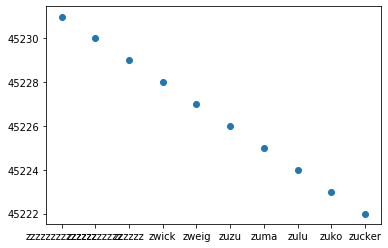

In [53]:
import matplotlib.pyplot as plt
plt.scatter(*zip(*word_dict[:10]))
plt.show()

In [59]:
word_dict[-200:]

[('1930s', 199),
 ('1930', 198),
 ('1927', 197),
 ('1926demons', 196),
 ('1924', 195),
 ('1923', 194),
 ('1922', 193),
 ('1920s', 192),
 ('1920', 191),
 ('1919', 190),
 ('1918', 189),
 ('1917', 188),
 ('1916', 187),
 ('1914', 186),
 ('1913', 185),
 ('1912', 184),
 ('1911', 183),
 ('1910', 182),
 ('1909', 181),
 ('1908', 180),
 ('1907', 179),
 ('1906', 178),
 ('1904', 177),
 ('1903', 176),
 ('1902', 175),
 ('1900s2', 174),
 ('1900s', 173),
 ('1900', 172),
 ('190', 171),
 ('19', 170),
 ('18yr', 169),
 ('18x', 168),
 ('18th', 167),
 ('18m', 166),
 ('1897', 165),
 ('1896', 164),
 ('1893', 163),
 ('1892', 162),
 ('1890', 161),
 ('1876', 160),
 ('1871', 159),
 ('187', 158),
 ('1865', 157),
 ('1864', 156),
 ('1862', 155),
 ('1860s', 154),
 ('1860', 153),
 ('1853', 152),
 ('1850s', 151),
 ('1850', 150),
 ('1844', 149),
 ('1842', 148),
 ('1841', 147),
 ('1840s', 146),
 ('183', 145),
 ('1818', 144),
 ('1814', 143),
 ('1812', 142),
 ('181', 141),
 ('180degree', 140),
 ('1806', 139),
 ('1800s', 13

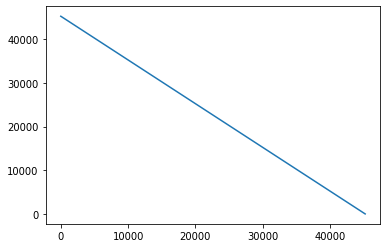

In [55]:
plt.plot([x[1] for x in word_dict])

In [62]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(count_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(count_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)


0.5887202089454783


### TfidfVectorizer

In [60]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

# Transform the training data: tfidf_train 
tfidf_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the test data: tfidf_test 
tfidf_test = tfidf_vectorizer.transform(X_test)

# Print the first 10 features
print(tfidf_vectorizer.get_feature_names()[:10])

# Print the first 5 vectors of the tfidf training data
print(tfidf_train.A[:5])


['00', '000', '0031', '007', '009so', '00pm', '00s', '01', '02', '02june2013']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [63]:
# Import the necessary modules
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

# Instantiate a Multinomial Naive Bayes classifier: nb_classifier
nb_classifier = MultinomialNB()

# Fit the classifier to the training data
nb_classifier.fit(tfidf_train,y_train)

# Create the predicted tags: pred
pred = nb_classifier.predict(tfidf_test)

# Calculate the accuracy score: score
score = metrics.accuracy_score(y_test, pred)
print(score)

0.5620306888671237


#### Word Tokenization with NLTK

In [15]:
df['reviewText_tokens'] = df['reviewText'].apply(lambda x: word_tokenize(x))

In [16]:
df['reviewText_bow'] = df['reviewText_tokens'].apply(lambda x: Counter([t.lower() for t in x]))

In [17]:
df[['reviewText_tokens', 'reviewText_bow']].head()

,reviewText_tokens,reviewText_bow
0,"[I, had, big, expectations, because, I, love, ...","{'i': 2, 'had': 1, 'big': 1, 'expectations': 1..."
1,"[I, highly, recommend, this, series, ., It, is...","{'i': 1, 'highly': 1, 'recommend': 1, 'this': ..."
2,"[This, one, is, a, real, snoozer, ., Do, n't, ...","{'this': 1, 'one': 1, 'is': 1, 'a': 1, 'real':..."
3,"[Mysteries, are, interesting, ., The, tension,...","{'mysteries': 1, 'are': 1, 'interesting': 1, '..."
4,"[This, show, always, is, excellent, ,, as, far...","{'this': 7, 'show': 6, 'always': 1, 'is': 8, '..."


In [ ]:
nltk lem
tokenization
remove singler pural
pos NER